### Importar dataframe

In [1]:
'''
Peguei uma base de dados de acidentes de trânsito em território americano, de forma a buscar prever o tempo de paralisia do trânsito
a partir de dados do acidente como local, hora e condições metereológicas.

A base de dados tem quase 6 milhões de linhas. Para rodar em meu computador, fui utilizando amostras menores do dataset

Base de dados retirada do Kaggle, de autoria de Sobhan Moosavi

 @misc{sobhan moosavi_2023,
	title={US Accidents (2016 - 2023)},
	url={https://www.kaggle.com/ds/199387},
	DOI={10.34740/KAGGLE/DS/199387},
	publisher={Kaggle},
	author={Sobhan Moosavi},
	year={2023}
}
'''

import pandas as pd


acidentes = pd.read_csv("US_Accidents_March23.csv")

display(acidentes)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


### Análises Iniciais

In [2]:
# ver qual é o estado e a cidade com a maior quantidade de acidentes
'''Como se pode ver, a Califórnia, a Flórida e Texas são os estados com o maior número de acidentes
Entre as cidades, destaca-se Miami, Houston e Los Angeles
'''

estado = acidentes[["State"]].groupby("State").value_counts().sort_values(ascending=False)
cidade = acidentes[["City"]].groupby("City").value_counts().sort_values(ascending=False)

print(estado[:3])
print()
print(cidade[:3])

State
CA    1741433
FL     880192
TX     582837
dtype: int64

City
Miami          186917
Houston        169609
Los Angeles    156491
dtype: int64


In [3]:
# locais com maior número de acidentes com alta severidade
'''
Quando analisados apenas os acidentes com o maior grau de severidade, os estados da Virgínia, Pensilvânia e California são
os com o maior número de acidentes
Atlanta, Miami e Visalia representam as cidades com o maior número de casos
'''

estado = acidentes[["State", "Severity"]]
cidade = acidentes[["City", "Severity"]]

estado = estado.loc[estado["Severity"]==4,:]
cidade = cidade.loc[cidade["Severity"]==4,:]

estado = estado[["State"]].groupby("State").value_counts().sort_values(ascending=False)
cidade = cidade[["City"]].groupby("City").value_counts().sort_values(ascending=False)

print(estado[:3])
print()
print(cidade[:3])



State
VA    18202
PA    15867
CA    13502
dtype: int64

City
Atlanta    2841
Miami      2192
Visalia    1286
dtype: int64


### Tratamento inicial do dataset

In [4]:
print(acidentes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
# retirar colunas cujos valores não façam sentido para a análise

'''
ID: não impactará na severidade do acidente
Source: não impactará na severidade do acidente
Description: despadronizado, e com informações que podem ser encontradas de outra forma
Street: já utilizarei a latitude e a longitude para dados geográficos
City: já utilizarei a latitude e a longitude para dados geográficos
County: já utilizarei a latitude e a longitude para dados geográficos
Country: todos os dados são dos EUA
State: já utilizarei a latitude e a longitude para dados geográficos
Zipcode: já utilizarei a latitude e a longitude para dados geográficos
Timezone: já utilizarei a latitude e a longitude para dados geográficos
Airport_Code: já utilizarei a latitude e a longitude para dados geográficos
Weather_Timestamp: não impactará na severidade do acidente
Amenity: 98.8% dos dados são iguais
Bump: 100% dos dados são iguais
Give_Way: 99.5% dos dados são iguais
No_Exit: 99.7% dos dados são iguais
Railway: 99.1% dos dados são iguais
Roundabout: 100% dos dados são iguais
Station: 97.4% dos dados são iguais
Stop: 97.2% dos dados são iguais
Traffic_Calming: 99.9% dos dados são iguais
Turning_Loop: 100% dos dados são iguais
Sunrise_Sunset: já utilizarei Start_Time para dados de hora do dia
Civil_Twilight: já utilizarei Start_Time para dados de hora do dia
Nautical_Twilight: já utilizarei Start_Time para dados de hora do dia
Astronomical_Twilight: já utilizarei Start_Time para dados de hora do dia
End_Lat: informação retirada da coluna distance já é sufuciente. Além disso, 44% dos valores estão vazios
End_Lng: informação retirada da coluna distance já é sufuciente. Além disso, 44% dos valores estão vazios
Severity: O usuário não saberá informar esse valor
Distance(mi): o usuário não saberá informar esse valor
'''
excluir = ["Distance(mi)", "Severity", "End_Lat", "End_Lng", "ID", "Source", "Description", "Street", "City", "County", "State", "Country", "Zipcode", "Timezone", "Airport_Code", "Weather_Timestamp", "Amenity", "Bump", "Give_Way", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Turning_Loop", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]

acidentes = acidentes.drop(excluir, axis=1)

display(acidentes)

,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal
0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False
1,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False
2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,True
3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False
4,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False
7728390,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False
7728391,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,True,False
7728392,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False


In [6]:
# tratar colunas e linhas com NAN
'''
Eliminação das colunas com 1 milhão ou mais NAN
Eliminação das linhas em branco
'''
for coluna in acidentes:
    if acidentes[coluna].isnull().sum() >= 1000000:
        acidentes = acidentes.drop(coluna, axis=1)
print(acidentes.isnull().sum())

# excluir linhas vazias restantes
acidentes = acidentes.dropna()

print(acidentes.isnull().sum())
print(len(acidentes))

Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Temperature(F)       163853
Humidity(%)          174144
Pressure(in)         140679
Visibility(mi)       177098
Wind_Direction       175206
Wind_Speed(mph)      571233
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
dtype: int64
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Crossing             0
Junction             0
Traffic_Signal       0
dtype: int64
7081646


In [7]:
# transformar tipo de dados para datetime
acidentes["Start_Time"] = pd.to_datetime(acidentes["Start_Time"])
acidentes["End_Time"] = pd.to_datetime(acidentes["End_Time"])

# criar nova coluna com o tempo total que afetou o trânsito
acidentes['Tempo de Paralisia(min)'] = acidentes['End_Time'].sub(acidentes['Start_Time'], axis=0)

# retirar colunas Start_Time e End_Time
acidentes = acidentes.drop("End_Time", axis=1)

display(acidentes)

,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Traffic_Signal,Tempo de Paralisia(min)
2,2016-02-08 06:49:27,39.063148,-84.032608,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,True,0 days 00:30:00
3,2016-02-08 07:23:34,39.747753,-84.205582,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,0 days 00:30:00
4,2016-02-08 07:39:07,39.627781,-84.188354,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,True,0 days 00:30:00
5,2016-02-08 07:44:26,40.100590,-82.925194,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,0 days 00:30:00
6,2016-02-08 07:59:35,39.758274,-84.230507,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2019-08-23 18:03:25,34.002480,-117.379360,86.0,40.0,28.92,10.0,W,13.0,Fair,False,False,False,0 days 00:28:36
7728390,2019-08-23 19:11:30,32.766960,-117.148060,70.0,73.0,29.39,10.0,SW,6.0,Fair,False,False,False,0 days 00:26:53
7728391,2019-08-23 19:00:21,33.775450,-117.847790,73.0,64.0,29.74,10.0,SSW,10.0,Partly Cloudy,False,True,False,0 days 00:28:28
7728392,2019-08-23 19:00:21,33.992460,-118.403020,71.0,81.0,29.62,10.0,SW,8.0,Fair,False,False,False,0 days 00:29:21


In [8]:
# criar nova coluna e pegar tempo de paralisia em minutos

print(acidentes["Tempo de Paralisia(min)"])

acidentes["Tempo de Paralisia(min)"] = acidentes["Tempo de Paralisia(min)"].dt.seconds
acidentes["Tempo de Paralisia(min)"] = acidentes["Tempo de Paralisia(min)"] / 60

print(acidentes["Tempo de Paralisia(min)"])

2         0 days 00:30:00
3         0 days 00:30:00
4         0 days 00:30:00
5         0 days 00:30:00
6         0 days 00:30:00
                ...      
7728389   0 days 00:28:36
7728390   0 days 00:26:53
7728391   0 days 00:28:28
7728392   0 days 00:29:21
7728393   0 days 00:29:25
Name: Tempo de Paralisia(min), Length: 7081646, dtype: timedelta64[ns]
2          30.000000
3          30.000000
4          30.000000
5          30.000000
6          30.000000
             ...    
7728389    28.600000
7728390    26.883333
7728391    28.466667
7728392    29.350000
7728393    29.416667
Name: Tempo de Paralisia(min), Length: 7081646, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_15876\106629078.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(acidentes.corr(), annot=True, cmap='Greens')


<Axes: >

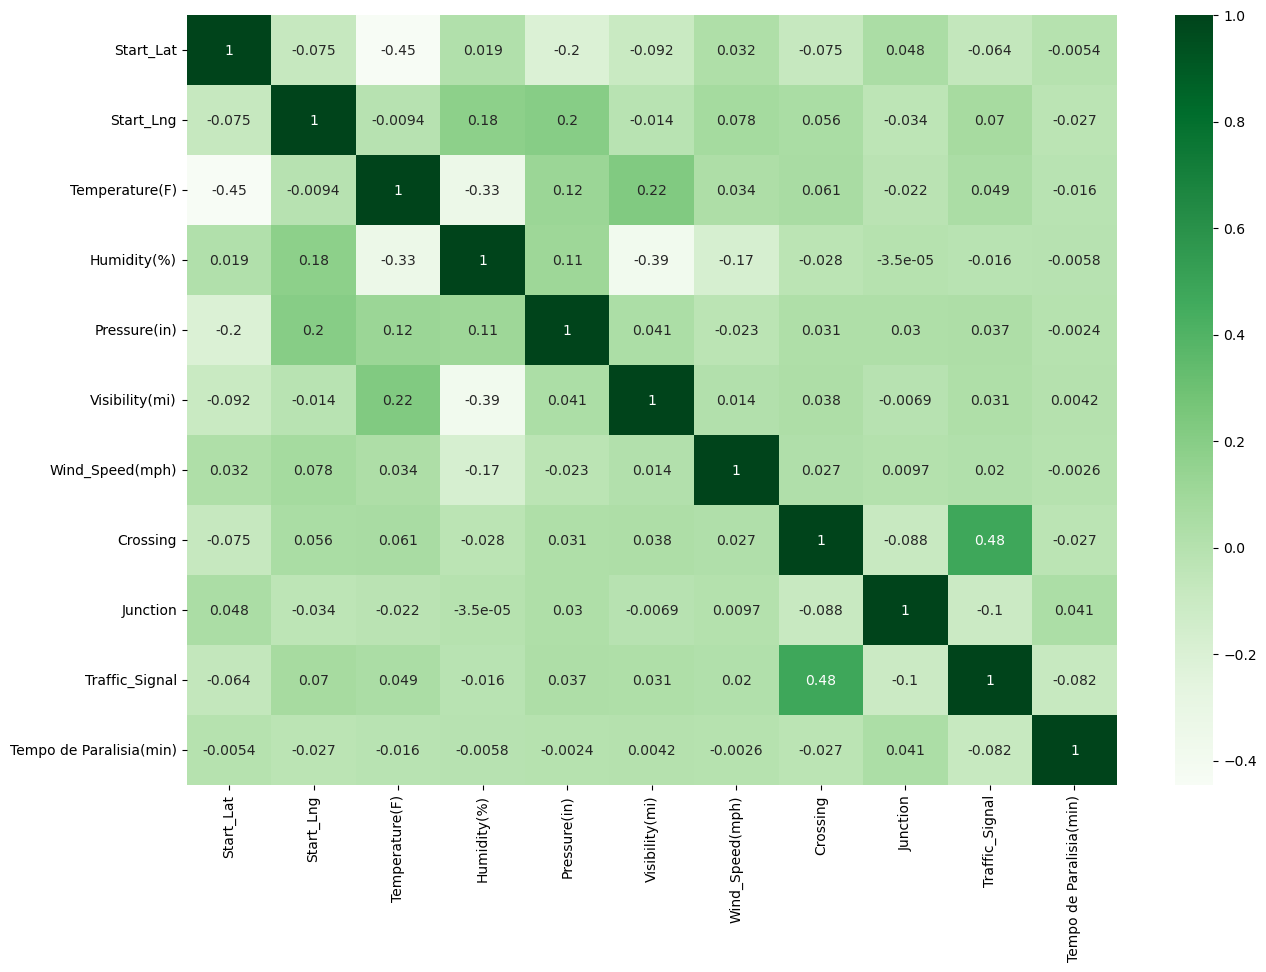

In [9]:
# Identificar correlação
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


plt.figure(figsize=(15, 10))
sns.heatmap(acidentes.corr(), annot=True, cmap='Greens')

### Removendo outliers das Colunas Numéricas

In [10]:
'''
Colunas numéricas

Temperature(F)         float64
Humidity(%)            float64
Pressure(in)           float64
Visibility(mi)         float64
Wind_Speed(mph)        float64
Tempo de Paralisia
'''

# funções auxiliares
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude


def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas


def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.displot(coluna)

### Coluna Temperature

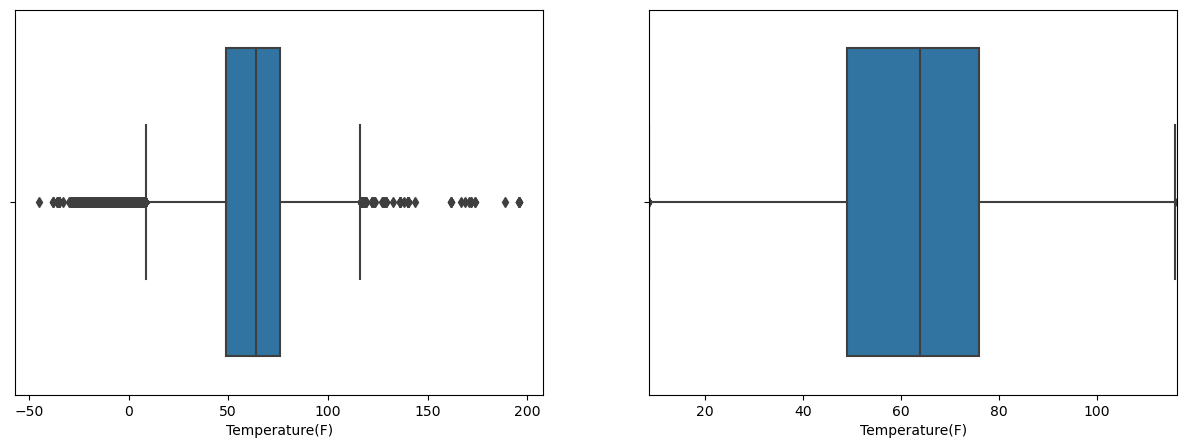

<Figure size 1500x500 with 0 Axes>

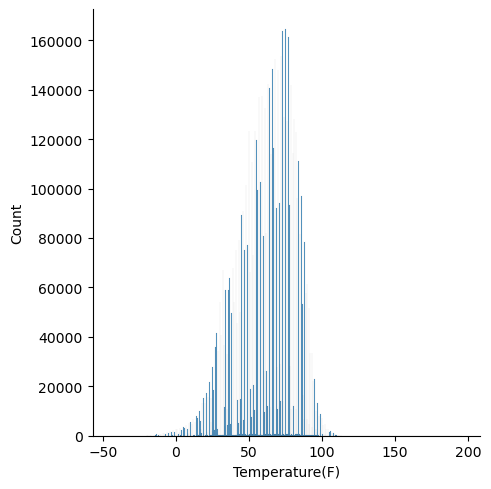

In [11]:
# coluna Temperature(F)

diagrama_caixa(acidentes['Temperature(F)'])
histograma(acidentes['Temperature(F)'])

47261 linhas removidas


<Figure size 1500x500 with 0 Axes>

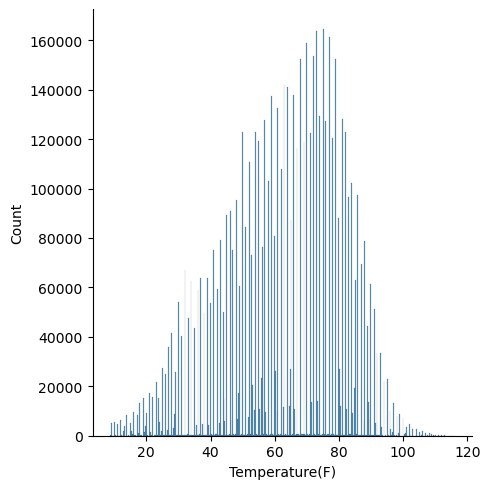

In [12]:
'''
Opto por retirar os outliers, considerando o modelo feito para dias comuns
'''
acidentes, linhas_removidas = excluir_outliers(acidentes, 'Temperature(F)')
print('{} linhas removidas'.format(linhas_removidas))

histograma(acidentes['Temperature(F)'])

### Coluna Humidity

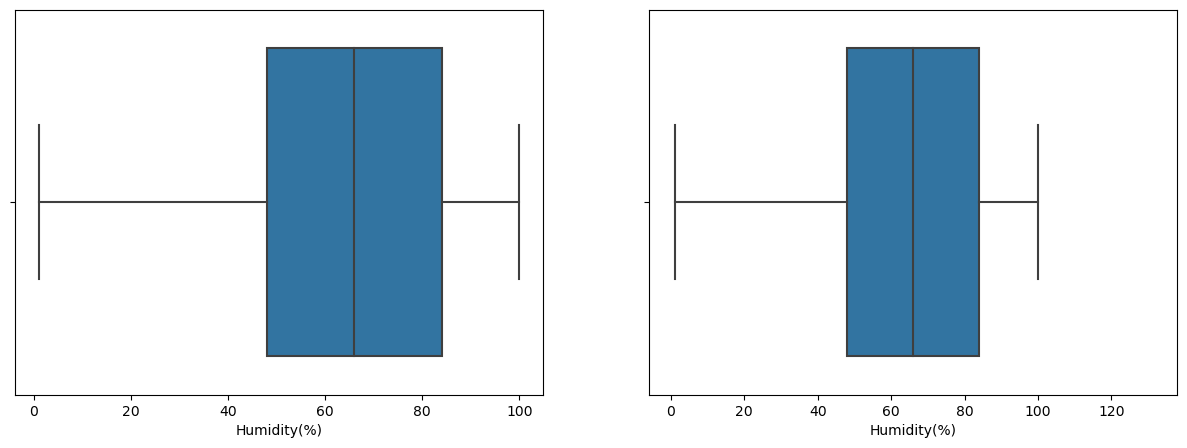

<Figure size 1500x500 with 0 Axes>

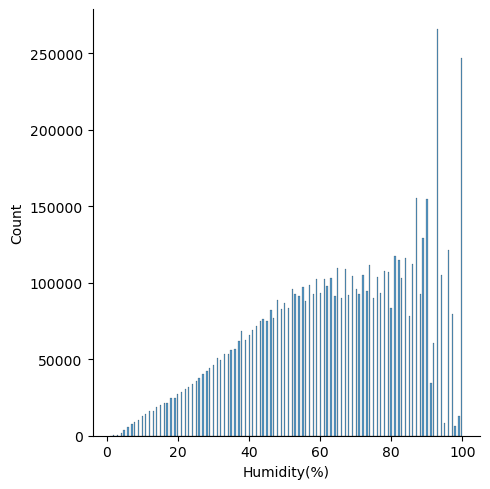

In [13]:
# coluna Humidity(%)

diagrama_caixa(acidentes['Humidity(%)'])
histograma(acidentes['Humidity(%)'])


0 linhas removidas


<Figure size 1500x500 with 0 Axes>

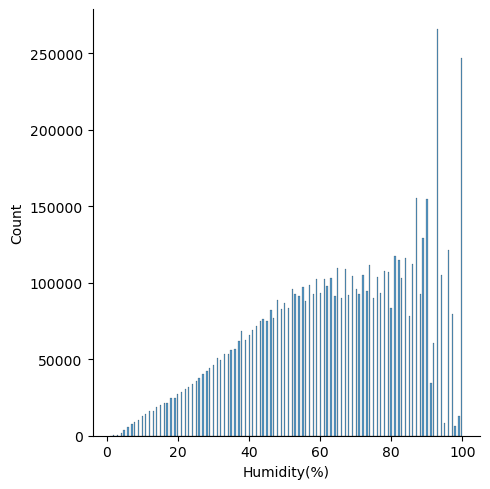

In [14]:
'''
Os valores já se encontram dentro dos parâmetros escolhidos
'''
acidentes, linhas_removidas = excluir_outliers(acidentes, 'Humidity(%)')
print('{} linhas removidas'.format(linhas_removidas))

histograma(acidentes['Humidity(%)'])


### Coluna Pressure

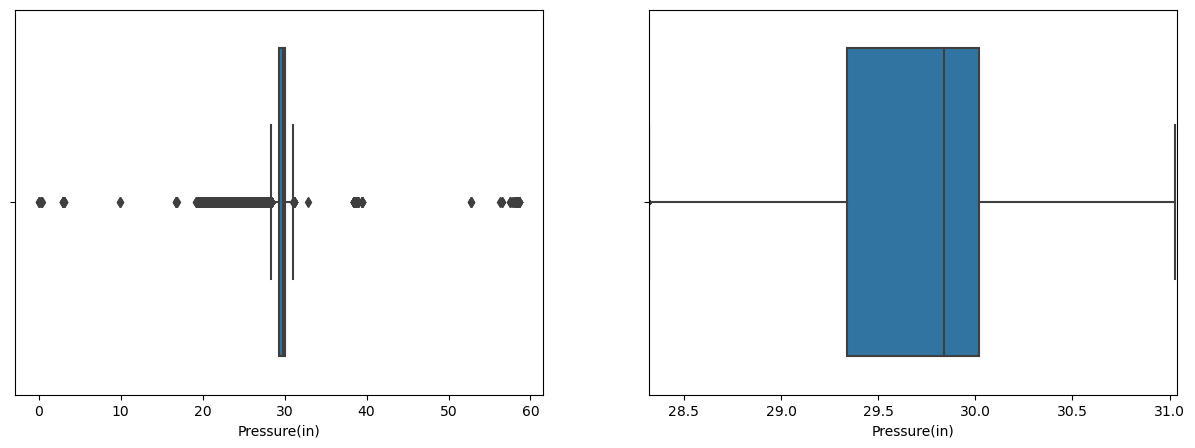

<Figure size 1500x500 with 0 Axes>

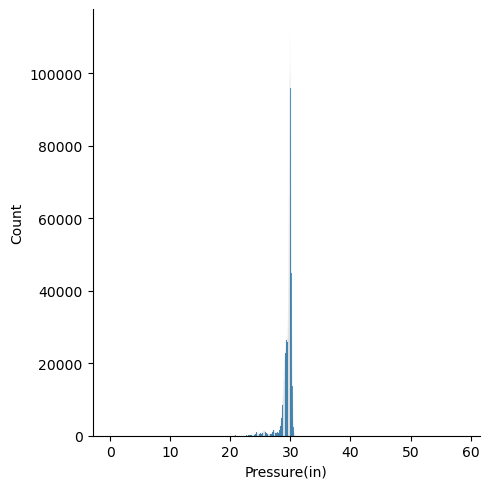

In [15]:
# coluna Pressure(in)

diagrama_caixa(acidentes['Pressure(in)'])
histograma(acidentes['Pressure(in)'])

404935 linhas removidas


<Figure size 1500x500 with 0 Axes>

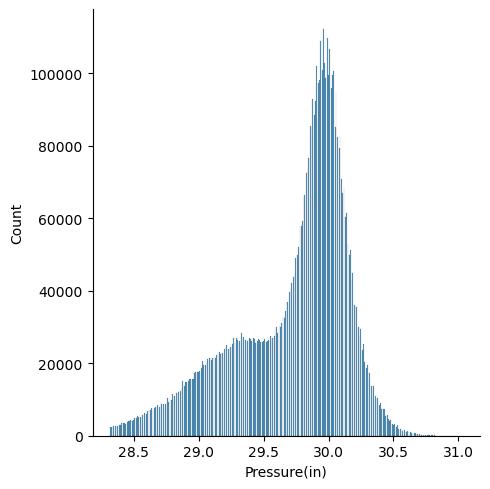

In [16]:
'''
Opto por retirar os outliers, seguindo a mesma lógica dos demais eventos climáticos

'''
acidentes, linhas_removidas = excluir_outliers(acidentes, 'Pressure(in)')
print('{} linhas removidas'.format(linhas_removidas))

histograma(acidentes['Pressure(in)'])


### Coluna Visibility

C:\Users\User\AppData\Local\Temp\ipykernel_15876\944548304.py:33: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


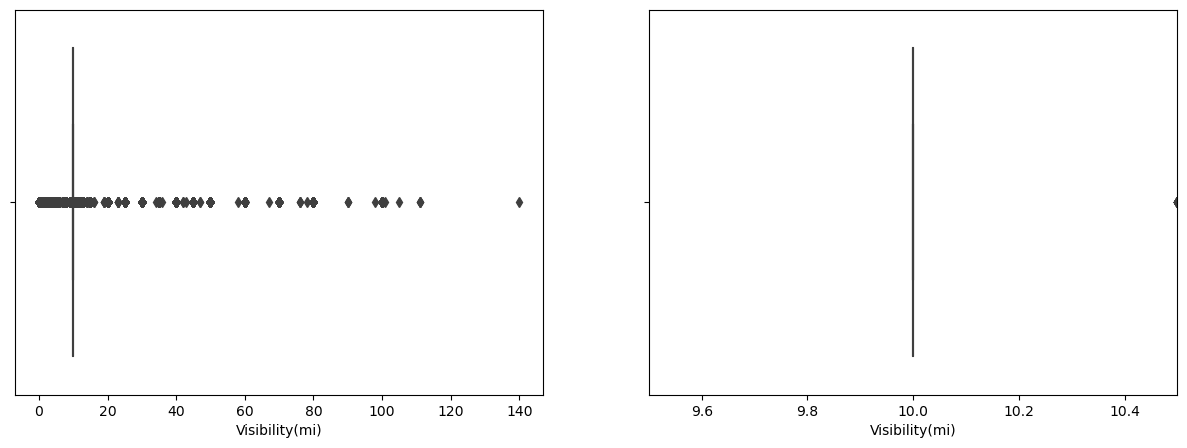

<Figure size 1500x500 with 0 Axes>

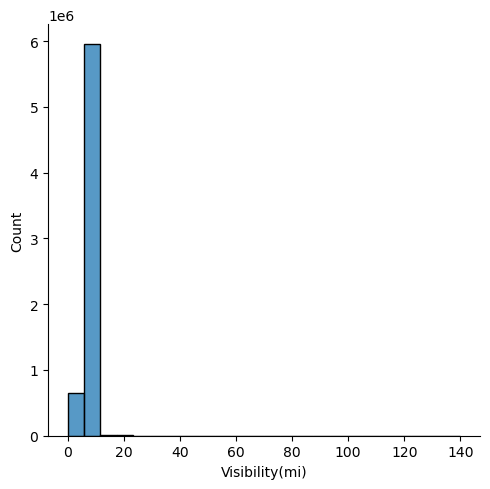

In [17]:
# coluna Visibility(mi)

diagrama_caixa(acidentes['Visibility(mi)'])
histograma(acidentes['Visibility(mi)'])

In [18]:
'''
Opto por retirar a coluna, considerando que a maioria dos valores é igual

'''
print(acidentes[["Visibility(mi)"]].groupby("Visibility(mi)").value_counts().sort_values(ascending=False))

acidentes = acidentes.drop("Visibility(mi)", axis=1)

Visibility(mi)
10.0     5367564
7.0       187419
9.0       163901
8.0       131326
5.0       124044
          ...   
98.0           1
101.0          1
105.0          1
4.5            1
140.0          1
Length: 78, dtype: int64


### Coluna Wind_Speed

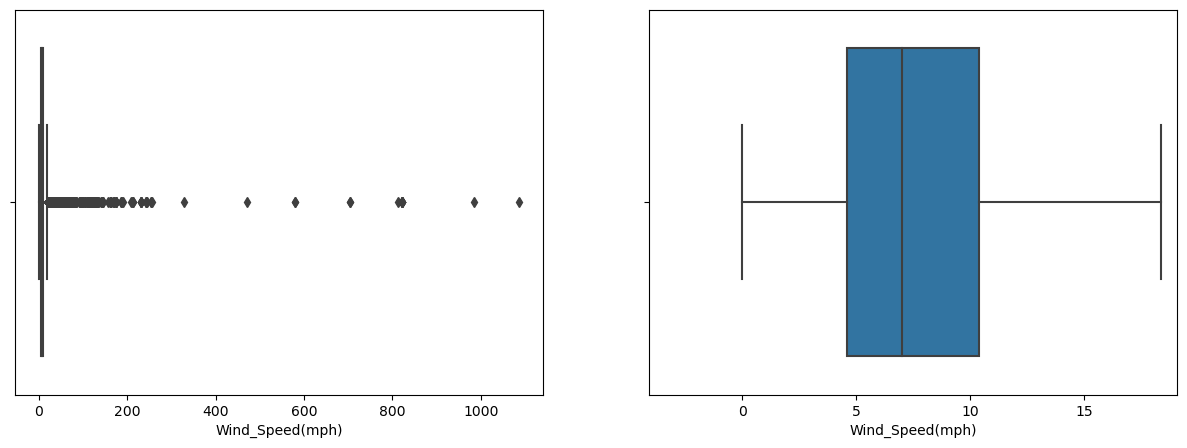

<Figure size 1500x500 with 0 Axes>

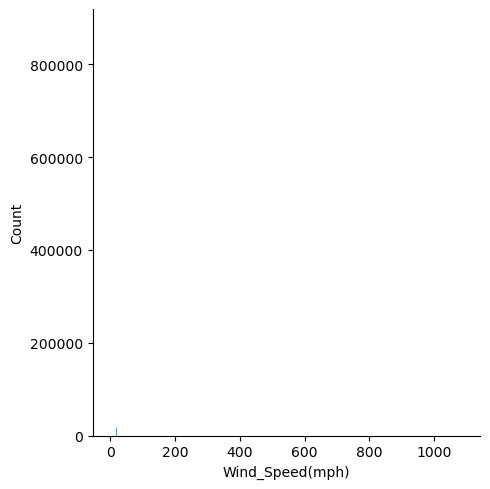

In [19]:
# coluna Wind_Speed(mph)

diagrama_caixa(acidentes['Wind_Speed(mph)'])
histograma(acidentes['Wind_Speed(mph)'])

177749 linhas removidas


<Figure size 1500x500 with 0 Axes>

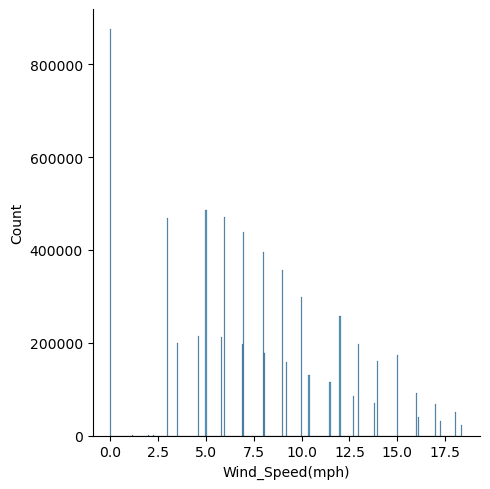

In [20]:
'''
Opto por retirar os outliers, seguindo a mesma lógica dos demais eventos climáticos

'''
acidentes, linhas_removidas = excluir_outliers(acidentes, 'Wind_Speed(mph)')
print('{} linhas removidas'.format(linhas_removidas))

histograma(acidentes['Wind_Speed(mph)'])


### Coluna Tempo de Paralisia

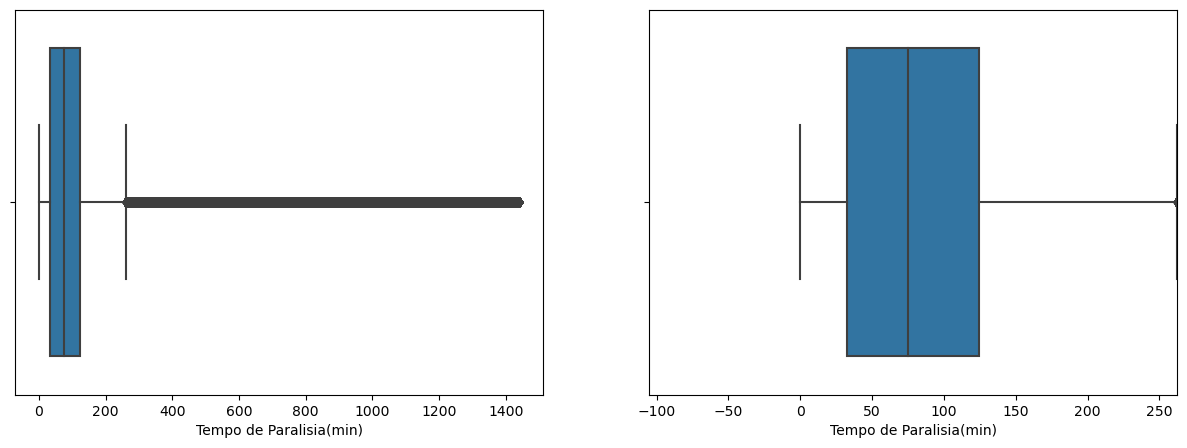

<Figure size 1500x500 with 0 Axes>

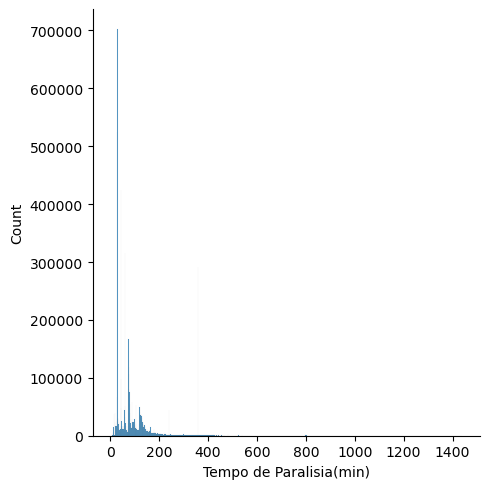

In [21]:
# coluna Tempo de Paralisia(min)

diagrama_caixa(acidentes['Tempo de Paralisia(min)'])
histograma(acidentes['Tempo de Paralisia(min)'])

577926 linhas removidas


<Figure size 1500x500 with 0 Axes>

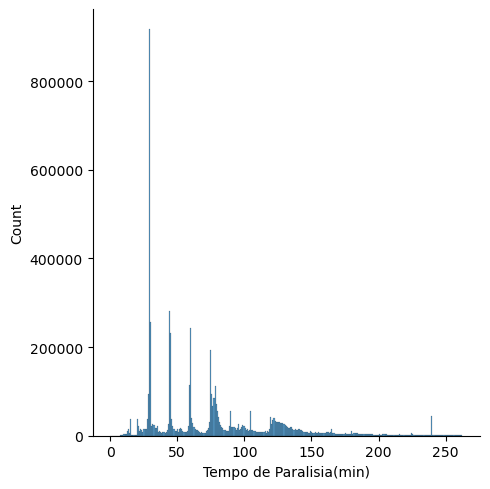

In [22]:
'''
Opto por retirar os outliers, considerando o modelo feito para dias comuns
'''
acidentes, linhas_removidas = excluir_outliers(acidentes, 'Tempo de Paralisia(min)')
print('{} linhas removidas'.format(linhas_removidas))

histograma(acidentes['Tempo de Paralisia(min)'])

### Normalização das colunas numéricas

In [25]:
colunas_numericas = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Wind_Speed(mph)"]

n_num = acidentes.drop(colunas_numericas, axis=1)

acidentes_norm = acidentes[colunas_numericas]

acidentes_norm = acidentes_norm.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

acidentes_norm = pd.concat([acidentes_norm, n_num], axis=1)

display(acidentes_norm)

,Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Start_Time,Start_Lat,Start_Lng,Wind_Direction,Weather_Condition,Crossing,Junction,Traffic_Signal,Tempo de Paralisia(min)
2,0.254884,1.000000,0.498155,0.190217,2016-02-08 06:49:27,39.063148,-84.032608,SW,Overcast,False,False,True,30.000000
3,0.246512,0.959596,0.487085,0.250000,2016-02-08 07:23:34,39.747753,-84.205582,SW,Mostly Cloudy,False,False,False,30.000000
4,0.254884,0.888889,0.490775,0.190217,2016-02-08 07:39:07,39.627781,-84.188354,SW,Mostly Cloudy,False,False,True,30.000000
5,0.272558,0.969697,0.483395,0.190217,2016-02-08 07:44:26,40.100590,-82.925194,SSW,Light Rain,False,False,False,30.000000
6,0.236279,1.000000,0.494465,0.190217,2016-02-08 07:59:35,39.758274,-84.230507,WSW,Overcast,False,False,False,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,0.720000,0.393939,0.221402,0.706522,2019-08-23 18:03:25,34.002480,-117.379360,W,Fair,False,False,False,28.600000
7728390,0.571163,0.727273,0.394834,0.326087,2019-08-23 19:11:30,32.766960,-117.148060,SW,Fair,False,False,False,26.883333
7728391,0.599070,0.636364,0.523985,0.543478,2019-08-23 19:00:21,33.775450,-117.847790,SSW,Partly Cloudy,False,True,False,28.466667
7728392,0.580465,0.808081,0.479705,0.434783,2019-08-23 19:00:21,33.992460,-118.403020,SW,Fair,False,False,False,29.350000


### Tratamento das colunas booleanas

In [26]:
'''
Opto por retirar a coluna Junction, considerando que mais de 93% dos dados são iguais.
Para as demais, transformarei em 0's e 1's

Colunas booleanas:

Crossing                 bool   
Junction                 bool   
Traffic_Signal           bool
'''

print(acidentes_norm[["Crossing"]].groupby("Crossing").value_counts())
print(f"{678164/len(acidentes_norm):.2%}")
print()
print(acidentes_norm[["Junction"]].groupby("Junction").value_counts())
print(f"{339624/len(acidentes_norm):.2%}")
print()
print(acidentes_norm[["Traffic_Signal"]].groupby("Traffic_Signal").value_counts())
print(f"{895251/len(acidentes_norm):.2%}")


acidentes_norm = acidentes_norm.drop("Junction", axis=1)

acidentes_norm["Crossing"] = acidentes_norm["Crossing"].astype(int)
acidentes_norm["Traffic_Signal"] = acidentes_norm["Traffic_Signal"].astype(int)

display(acidentes_norm["Crossing"])
display(acidentes_norm["Traffic_Signal"])

Crossing
False    5183602
True      690173
dtype: int64
11.55%

Junction
False    5472891
True      400884
dtype: int64
5.78%

Traffic_Signal
False    4960140
True      913635
dtype: int64
15.24%


2          0
3          0
4          0
5          0
6          0
          ..
7728389    0
7728390    0
7728391    0
7728392    0
7728393    0
Name: Crossing, Length: 5873775, dtype: int32

2          1
3          0
4          1
5          0
6          0
          ..
7728389    0
7728390    0
7728391    0
7728392    0
7728393    0
Name: Traffic_Signal, Length: 5873775, dtype: int32

### Tratamento das features restantes

In [27]:
'''
Wind_Direction           object
Weather_Condition        object
'''
# Coluna Wind_Direction (reduzir e padronizar possibilidades)
display(acidentes_norm[["Wind_Direction"]].groupby("Wind_Direction").value_counts())

acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "East", "Wind_Direction"] = "E"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "North", "Wind_Direction"] = "N"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "South", "Wind_Direction"] = "S"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "West", "Wind_Direction"] = "W"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "Variable", "Wind_Direction"] = "VAR"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "ENE", "Wind_Direction"] = "NE"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "ESE", "Wind_Direction"] = "SE"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "NNE", "Wind_Direction"] = "NE"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "NNW", "Wind_Direction"] = "NW"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "SSE", "Wind_Direction"] = "SE"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "SSW", "Wind_Direction"] = "SW"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "WNW", "Wind_Direction"] = "NW"
acidentes_norm.loc[acidentes_norm["Wind_Direction"] == "WSW", "Wind_Direction"] = "SW"

print()
display(acidentes_norm[["Wind_Direction"]].groupby("Wind_Direction").value_counts())

Wind_Direction
CALM        818195
E           237235
ENE         218179
ESE         224114
East         83711
N           252706
NE          219206
NNE         214660
NNW         263554
NW          287884
North       100766
S           348899
SE          242223
SSE         283990
SSW         318310
SW          298642
South       138670
VAR         213427
Variable     94789
W           310499
WNW         294864
WSW         286472
West        122780
dtype: int64

Wind_Direction
CALM    818195
E       320946
N       353472
NE      652045
NW      846302
S       487569
SE      750327
SW      903424
VAR     308216
W       433279
dtype: int64

### Coluna Weather_Condition

In [28]:
clima = acidentes_norm[["Weather_Condition"]].groupby("Weather_Condition").value_counts().sort_values(ascending=False)

print(list(clima.index))

# Coluna Weather_Condition (reduzir e padronizar possibilidades)
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Fair", "Weather_Condition"] = "Sunny"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Blowing Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Mostly Cloudy", "Weather_Condition"] = "Cloudy"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Overcast", "Weather_Condition"] = "Cloudy"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Scattered Clouds", "Weather_Condition"] = "Sunny"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Partly Cloudy", "Weather_Condition"] = "Sunny"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Rain", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Drizzle", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunder in the Vicinity", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "T-Storm", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunder", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Patches of Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Freezing Rain", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain with Thunder", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Thunderstorms and Rain", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy T-Storm", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Wintry Mix", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Drizzle", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Shallow Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Mist", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Thunderstorms and Rain", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunderstorms and Rain", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Freezing Drizzle", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Showers in the Vicinity", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Freezing Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Drizzle", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Drizzle and Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Snow and Sleet", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Sleet", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Ice Pellets", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain Shower", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Blowing Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow and Sleet", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain Showers", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Ice Pellets", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Rain Showers", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Small Hail", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Rain Shower", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Widespread Dust", "Weather_Condition"] = "Dust storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Blowing Dust", "Weather_Condition"] = "Dust storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Sand / Dust Whirlwinds", "Weather_Condition"] = "Dust storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Sleet", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Freezing Drizzle", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunder / Wintry Mix", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Hail", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow Shower", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow Showers", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Funnel Cloud", "Weather_Condition"] = "Tornado"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow with Thunder", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain Shower", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Freezing Rain", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Haze", "Weather_Condition"] = "Smoke"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunder and Hail", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Thunderstorms and Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Squalls", "Weather_Condition"] = "Wind storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Snow with Thunder", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Rain Showers", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Thunderstorms with Small Hail", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Snow Grains", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Snow Grains", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Hail", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Snow and Thunder", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Thunderstorm", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Thunderstorms and Snow", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Freezing Drizzle", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Sleet and Thunder", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Sand / Dust Whirls Nearby", "Weather_Condition"] = "Dust storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Snow Showers", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Blowing Sand", "Weather_Condition"] = "Dust storm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Rain Shower", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Sleet and Thunder", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Light Rain Shower", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Drifting Snow", "Weather_Condition"] = "Snow"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Rain and Sleet", "Weather_Condition"] = "Rain"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Partial Fog", "Weather_Condition"] = "Fog"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Freezing Rain", "Weather_Condition"] = "Sleet"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Heavy Thunderstorms and Snow", "Weather_Condition"] = "Thunderstorm"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Clear", "Weather_Condition"] = "Sunny"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Haze", "Weather_Condition"] = "Smoke"

clima1 = acidentes_norm[["Weather_Condition"]].groupby("Weather_Condition").value_counts().sort_values(ascending=False)
print(clima1)


['Fair', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy', 'Clear', 'Light Rain', 'Overcast', 'Scattered Clouds', 'Light Snow', 'Fog', 'Rain', 'Haze', 'Heavy Rain', 'Light Drizzle', 'Thunder in the Vicinity', 'T-Storm', 'Thunder', 'Light Rain with Thunder', 'Smoke', 'Wintry Mix', 'Snow', 'Heavy T-Storm', 'Drizzle', 'Light Thunderstorms and Rain', 'Thunderstorm', 'Patches of Fog', 'Light Freezing Rain', 'Heavy Snow', 'Shallow Fog', 'Mist', 'Heavy Thunderstorms and Rain', 'Thunderstorms and Rain', 'N/A Precipitation', 'Showers in the Vicinity', 'Light Freezing Drizzle', 'Light Freezing Fog', 'Heavy Drizzle', 'Drizzle and Fog', 'Snow and Sleet', 'Light Sleet', 'Light Ice Pellets', 'Light Rain Shower', 'Light Snow and Sleet', 'Blowing Snow', 'Freezing Rain', 'Sleet', 'Blowing Dust', 'Light Rain Showers', 'Ice Pellets', 'Rain Showers', 'Small Hail', 'Rain Shower', 'Sand / Dust Whirlwinds', 'Widespread Dust', 'Hail', 'Partial Fog', 'Heavy Sleet', 'Freezing Drizzle', 'Thunder / Wintry Mix', 'Light 

In [29]:
# agrupar linhas com menos de 50k aparições

acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Sleet", "Weather_Condition"] = "Other"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "N/A Precipitation", "Weather_Condition"] = "Other"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Dust storm", "Weather_Condition"] = "Other"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Tornado", "Weather_Condition"] = "Other"
acidentes_norm.loc[acidentes_norm["Weather_Condition"] == "Wind storm", "Weather_Condition"] = "Other"

clima1 = acidentes[["Weather_Condition"]].groupby("Weather_Condition").value_counts().sort_values(ascending=False)
print(clima1)

Weather_Condition
Fair                       2147377
Mostly Cloudy               821132
Cloudy                      699546
Partly Cloudy               561911
Clear                       493113
                            ...   
Light Thunderstorm               2
Heavy Sleet and Thunder          2
Heavy Rain Shower                1
Rain and Sleet                   1
Drifting Snow                    1
Length: 90, dtype: int64


### Feature Engineering para Nova Coluna com Dia da Semana

In [30]:
# transformar tipo de dados para datetime
acidentes_norm["Start_Time"] = pd.to_datetime(acidentes_norm["Start_Time"])

# criar nova coluna
acidentes_norm["Dia"] = acidentes_norm["Start_Time"].dt.day_name()

### Ajustando a Coluna de Tempo

In [33]:
# arredondar para a hora mais próxima
acidentes_norm["Start_Time"] = acidentes_norm["Start_Time"].dt.round("H").dt.hour


# agrupar valores, visando a simplificação do modelo
# madrugada
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 1) | (acidentes_norm["Start_Time"] == 2) | (acidentes_norm["Start_Time"] == 3) | (acidentes_norm["Start_Time"] == 4) | (acidentes_norm["Start_Time"] == 5), "Start_Time"] = "Madrugada"

# indo pro trabalho
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 6) | (acidentes_norm["Start_Time"] == 7) | (acidentes_norm["Start_Time"] == 8) | (acidentes_norm["Start_Time"] == 9), "Start_Time"] = "Indo_trabalho"

# trabalho
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 10) | (acidentes_norm["Start_Time"] == 11), "Start_Time"] = "Trabalho_manha"

# almoco
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 12) | (acidentes_norm["Start_Time"] == 13) | (acidentes_norm["Start_Time"] == 14), "Start_Time"] = "Almoco"

# trabalho
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 15) | (acidentes_norm["Start_Time"] == 16), "Start_Time"] = "Trabalho_tarde"

# saindo do trabalho
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 17) | (acidentes_norm["Start_Time"] == 18) | (acidentes_norm["Start_Time"] == 19), "Start_Time"] = "Saindo_trabalho"

# noite
acidentes_norm.loc[(acidentes_norm["Start_Time"] == 20) | (acidentes_norm["Start_Time"] == 21) | (acidentes_norm["Start_Time"] == 22) | (acidentes_norm["Start_Time"] == 23) | (acidentes_norm["Start_Time"] == 0), "Start_Time"] = "Noite"

ver = acidentes_norm[["Start_Time"]].groupby("Start_Time").value_counts()

print(ver)

Start_Time
Almoco              841741
Indo_trabalho      1408560
Madrugada           415548
Noite               694642
Saindo_trabalho    1157402
Trabalho_manha      528522
Trabalho_tarde      827360
dtype: int64


### Encoding das features de categoria

In [34]:
# visualização do dataset após os tratamentos
print(acidentes_norm.info())
print(acidentes_norm.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5873775 entries, 2 to 7728393
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Temperature(F)           float64
 1   Humidity(%)              float64
 2   Pressure(in)             float64
 3   Wind_Speed(mph)          float64
 4   Start_Time               object 
 5   Start_Lat                float64
 6   Start_Lng                float64
 7   Wind_Direction           object 
 8   Weather_Condition        object 
 9   Crossing                 int32  
 10  Traffic_Signal           int32  
 11  Tempo de Paralisia(min)  float64
 12  Dia                      object 
dtypes: float64(7), int32(2), object(4)
memory usage: 582.6+ MB
None
Temperature(F)             0
Humidity(%)                0
Pressure(in)               0
Wind_Speed(mph)            0
Start_Time                 0
Start_Lat                  0
Start_Lng                  0
Wind_Direction             0
Weather_Conditio

### Análise PCA

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

colunas_categorias = ['Wind_Direction', 'Weather_Condition', 'Start_Time', "Dia"]
teste = pd.get_dummies(data=acidentes_norm, columns=colunas_categorias)

pca = PCA()
pca.fit(teste)

impacto_pca = pca.explained_variance_ratio_

for i, impacto in enumerate(impacto_pca):
    print(f'Coluna {i+1}: {impacto}')

# colunas_categorias = ['Start_Time', 'Wind_Direction', 'Weather_Condition']
# acidentes_enc = pd.get_dummies(data=acidentes, columns=colunas_categorias)
# display(acidentes_enc.head())

Coluna 1: 0.8871296147685611
Coluna 2: 0.1027891170136656
Coluna 3: 0.008859072744808053
Coluna 4: 0.00014083780535722266
Coluna 5: 8.716873885867081e-05
Coluna 6: 6.232480016563782e-05
Coluna 7: 6.182849703588233e-05
Coluna 8: 5.994633854812816e-05
Coluna 9: 5.911389382923305e-05
Coluna 10: 5.834580903996818e-05
Coluna 11: 5.554739402059838e-05
Coluna 12: 5.505532870157888e-05
Coluna 13: 5.213516770437044e-05
Coluna 14: 4.936231274754227e-05
Coluna 15: 4.632066824731905e-05
Coluna 16: 4.206058129008947e-05
Coluna 17: 4.1124952858501874e-05
Coluna 18: 3.625432022151271e-05
Coluna 19: 3.364261083477687e-05
Coluna 20: 3.2055207367791074e-05
Coluna 21: 3.182644712010915e-05
Coluna 22: 2.7141260354828164e-05
Coluna 23: 2.6777973115675115e-05
Coluna 24: 2.4919370904725807e-05
Coluna 25: 2.2393590626599122e-05
Coluna 26: 2.116042543888476e-05
Coluna 27: 1.978881384205742e-05
Coluna 28: 1.8476459239840123e-05
Coluna 29: 1.0811263600567052e-05
Coluna 30: 9.891045725285844e-06
Coluna 31: 8.5284

In [36]:
'''
Percebe-se que as colunas de dias da semana e dos horários não apresentam tanta variabilidade nos dados
'''
colunas = list(teste.columns)
dic = dict()
for i in range(len(impacto_pca)):
    dic[colunas[i]] = impacto_pca[i]

df = pd.DataFrame({"Coluna": colunas, "Peso": impacto_pca})

print(df.sort_values(by="Peso", ascending=False))

                            Coluna          Peso
0                   Temperature(F)  8.871296e-01
1                      Humidity(%)  1.027891e-01
2                     Pressure(in)  8.859073e-03
3                  Wind_Speed(mph)  1.408378e-04
4                        Start_Lat  8.716874e-05
5                        Start_Lng  6.232480e-05
6                         Crossing  6.182850e-05
7                   Traffic_Signal  5.994634e-05
8          Tempo de Paralisia(min)  5.911389e-05
9              Wind_Direction_CALM  5.834581e-05
10                Wind_Direction_E  5.554739e-05
11                Wind_Direction_N  5.505533e-05
12               Wind_Direction_NE  5.213517e-05
13               Wind_Direction_NW  4.936231e-05
14                Wind_Direction_S  4.632067e-05
15               Wind_Direction_SE  4.206058e-05
16               Wind_Direction_SW  4.112495e-05
17              Wind_Direction_VAR  3.625432e-05
18                Wind_Direction_W  3.364261e-05
19        Weather_Co

### Modelo de Previsão

In [38]:
'''
avaliação pelo r² e erro quadrático médio
'''
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# função auxiliar
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [39]:
'''
Modelos Testados:

RandomForest (performou melhor)
LinearRegression
Extra Tree
'''

# redução dos dados, considerando o poder computacional disponível
amostra = teste.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(n_jobs=-1)
modelo_lr = LinearRegression(n_jobs=-1)
modelo_et = ExtraTreesRegressor(n_jobs=-1)

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:24.30%
RSME:43.88
Modelo LinearRegression:
R²:5.90%
RSME:48.93
Modelo ExtraTrees:
R²:15.94%
RSME:46.24


### Ajustes e Melhoria do Modelo que Performou Melhor

,0
Start_Lng,0.174537
Start_Lat,0.170810
Wind_Speed(mph),0.142705
Pressure(in),0.116275
Temperature(F),0.092181
Humidity(%),0.091769
Dia_Friday,0.010323
Dia_Thursday,0.009977
Dia_Wednesday,0.009926
Dia_Tuesday,0.009897


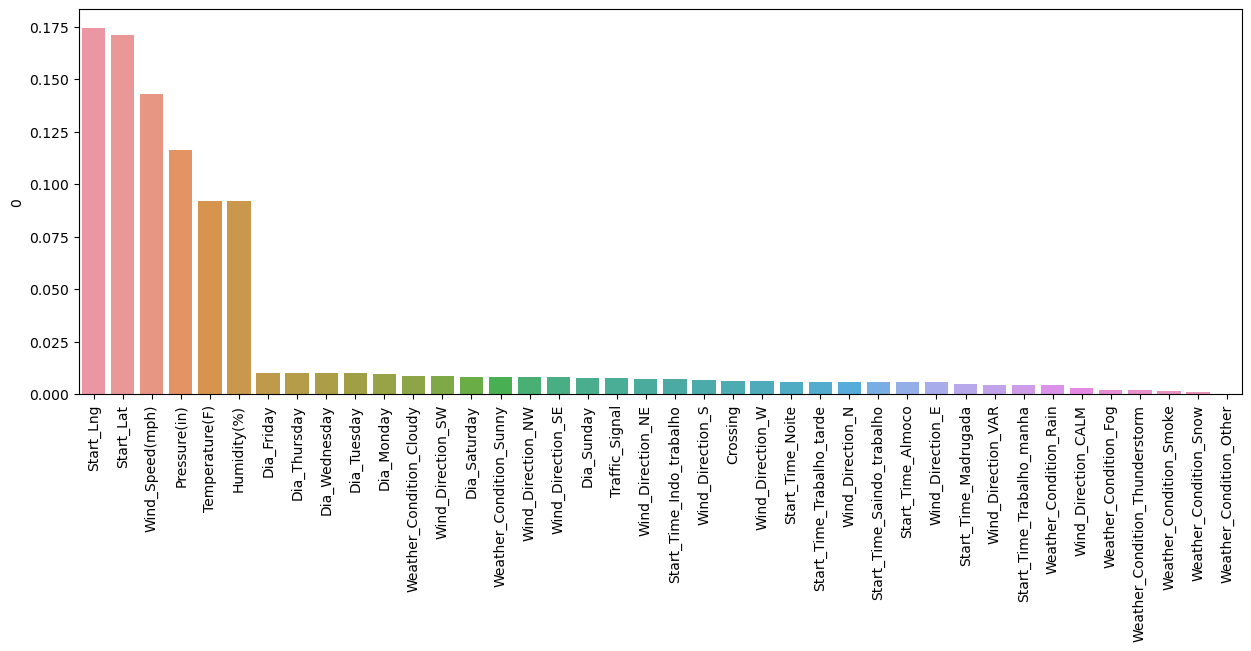

In [40]:
#print(modelo_et.feature_importances_)
#print(X_train.columns)
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Filtrar Colunas que Não Tiveram Tanto Impacto no Modelo Mais Assertivo

In [44]:
reduzida = teste[["Start_Lng", "Start_Lat", "Wind_Speed(mph)", "Pressure(in)", "Temperature(F)", "Humidity(%)", "Tempo de Paralisia(min)"]]

### Teste do Modelo Reduzido

In [45]:
'''
Considerando que a acurácia do modelo está muito baixa, mesmo a diminuição do r2 sendo pequena com o enxugamento do modelo, 
ainda assim optarei por deixar as demais colunas, visando otimizar o r2 dentro do possível
'''

teste2 = reduzida.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(n_jobs=-1):
R²:22.11%
RSME:44.52


### Ajuste de Hiperparâmetros

In [46]:
# n_estimators
teste2 = teste.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(n_estimators=200, n_jobs=-1):
R²:24.62%
RSME:43.79


In [47]:
# max_depth
teste2 = teste.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(max_depth=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(max_depth=30, n_jobs=-1):
R²:24.71%
RSME:43.76


In [48]:
# min_samples_split
teste2 = teste.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(min_samples_split=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(min_samples_split=30, n_jobs=-1):
R²:24.92%
RSME:43.71


In [49]:
# min_samples_leaf
teste2 = teste.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(min_samples_leaf=20, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(min_samples_leaf=20, n_jobs=-1):
R²:24.33%
RSME:43.88


In [50]:
# combinação (apenas o min_samples_split gerou um resultado maior)
teste2 = teste.copy()

amostra = teste2.sample(frac=0.1, random_state=42)

modelo_rf = RandomForestRegressor(max_depth=30, min_samples_split=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))


Modelo RandomForestRegressor(max_depth=30, min_samples_split=30, n_jobs=-1):
R²:24.85%
RSME:43.72


### Teste com Maior Volume de Dados

In [53]:
# todas variáveis e com 30% da base

teste2 = teste.copy()

amostra = teste2.sample(frac=0.3, random_state=42)

modelo_rf = RandomForestRegressor(min_samples_split=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))


Modelo RandomForestRegressor(min_samples_split=30, n_jobs=-1):
R²:28.67%
RSME:42.68


In [54]:
# variáveis mais relevantes e 30% da base

teste3 = teste[["Start_Lat", "Start_Lng", "Pressure(in)", "Temperature(F)", "Humidity(%)", "Wind_Speed(mph)", "Tempo de Paralisia(min)"]]

amostra = teste3.sample(frac=0.3, random_state=42)

modelo_rf = RandomForestRegressor(n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(n_jobs=-1):
R²:27.31%
RSME:43.09


In [55]:
# todas variáveis e com 35% da base

teste2 = teste.copy()

amostra = teste2.sample(frac=0.35, random_state=42)

modelo_rf = RandomForestRegressor(min_samples_split=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))

Modelo RandomForestRegressor(min_samples_split=30, n_jobs=-1):
R²:29.50%
RSME:42.42


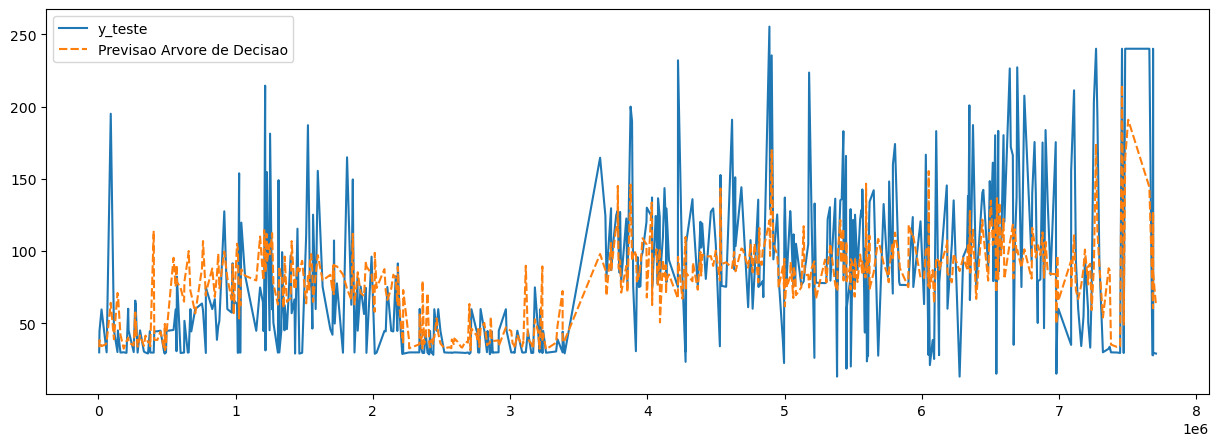

In [56]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_test
tabela_auxiliar["Previsao Arvore de Decisao"] = previsao

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar[:500])
plt.show()

In [57]:
# reduzir ainda mais o espaço amostral do tempo de paralisia
'''
Com a redução para até 3 horas, o modelo melhorou um pouco, e o erro diminuiu consideravelmente
'''

# testar para até 3 horas
# todas variáveis e com 35% da base

teste5 = teste.copy()

teste5 = teste5.loc[teste5["Tempo de Paralisia(min)"] <= 180, :]

amostra = teste5.sample(frac=0.35, random_state=42)

modelo_rf = RandomForestRegressor(min_samples_split=30, n_jobs=-1)


y = amostra['Tempo de Paralisia(min)']
X = amostra.drop('Tempo de Paralisia(min)', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)
#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo(modelo_rf, y_test, previsao))


Modelo RandomForestRegressor(min_samples_split=30, n_jobs=-1):
R²:29.90%
RSME:33.51


In [ ]:
'''
Em conclusão, mesmo com todas as tentativas de aumento da performance do modelo, o r2 continuou bem baixo, sendo o maior fator de
melhoria do modelo o aumento no número de linhas utilizadas. Nesse sentido, devido a limitações de processamento computacional,
optou-se por finalizar as análises por aqui. Entretanto, há espaço para melhorias.
'''

In [8]:
!git clone https://github.com/RicardoAccorsi/Trainee_Semana1.git

Cloning into 'Trainee_Semana1'...
